In [1]:
import numpy, seaborn

In [2]:
import pandas
pandas.set_option('display.max_colwidth', None)

In [3]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

### read biomarkers and dose responders

In [5]:
# read biomarkers
df = pandas.read_excel('/Users/adrian/hub/vigur/002.transcriptomics/arnar_biomarkers/Endothelialbiomarkers.xlsx')
print(df.shape)
biomarkers = list(set(df['Gene']))
print(len(biomarkers))

for element in biomarkers:
    the_list = list(df['Gene'])
    counter = the_list.count(element)
    if counter > 1:
        print(f'Element {element} is twice')
print(len(biomarkers), biomarkers[:5])

(70, 6)
67
Element EDN1 is twice
Element CD40LG is twice
Element ANGPT2 is twice
67 ['DDAH2', 'ANGPT1', 'F3', 'PECAM1', 'GPC3']


In [6]:
# read dose responders
df = pandas.read_csv('/Users/adrian/hub/vigur/003.proteomics/dose_responders_gene_results.txt', sep='\s+', index_col=0)
print(df.shape)

together = list(set(biomarkers + list(set(df['gene_name']))))
print(len(together), together)

biomarkers = together

## SELE is the only overlap btw biomarkers and dose responders, isnt that interesting!

(84, 3)
150 ['DOCK8', 'TFPI2', 'ANGPT1', 'GPC3', 'STARD13-IT1', 'AL049871.1', 'STAMBPL1', 'PDFGA', 'IRAK2', 'FGA', 'THBD', 'ABCB1', 'PF4V1', 'GPC6', 'CLCF1', 'EGLN', 'CTH', 'SH3RF2', 'CHMP1B-AS1', 'TGFB1', 'SDC2', 'SOCS2', 'SERPINC1', 'PDK4', 'NTRK1', 'LINC01669', 'SLC7A2', 'AGTR1', 'SIK1B', 'SELE', 'SDC4', 'PDE3A', 'HR', 'VWF', 'APOLD1', 'ALG13', 'TIMP1', 'SERPINE1', 'EDN1', 'ITGAX', 'FLT1', 'AC012181.1', 'VEGFA', 'VIP', 'MPO', 'PLA2G7', 'PTGS2', 'F2', 'ADAMTS13', 'LINC00313', 'AL136452.1', 'ANGPTL2', 'SDC1', 'KIAA1755', 'GPC4', 'KLF4', 'FGF18', 'TEK', 'IL11', 'TMEM87A', 'SULT1B1', 'TNFSF15', 'MYPN', 'IL1B', 'GPC2', 'RHEBP2', 'PGF', 'DDAH1', 'NR4A2', 'SNAI2', 'TNFRSF11B', 'ICAM2', 'F3', 'PECAM1', 'CHRNA9', 'SLC2A1', 'VCAM1', 'GRAMD1B', 'PLAT', 'GPC1', 'ALB', 'CAV1', 'DNAJB5-DT', 'DUSP4', 'IL6', 'SELP', 'SYF2P2', 'CREM', 'AL117336.1', 'PGAM1P1', 'KSR2', 'GPC5', 'FOXS1', 'LRRC1', 'SCN3B', 'ABCG1', 'HERPUD1', 'CD40LG', 'SHH', 'GNAL', 'SLC7A5', 'SELL', 'KIFC1', 'PRAG1', 'RNF152', 'PDE4D',

### read colored proteins

In [7]:
# read colored proteins 04 
df = pandas.read_csv('../colored_proteins_04.tsv', sep='\t')
print(df.columns)
df = df[df["Color_in_plot"].isin(["red", "blue"])]
intersect = list(set(biomarkers) & set(df['Gene_name']))
sub = df[df['Gene_name'].isin(intersect)]
hits04 = sub['Uniprot_gene_ID'].to_list()
print(len(hits04), hits04)
sub

Index(['Uniprot_ID', 'Uniprot_gene_ID', 'Gene_name', 'ENSEMBL', 'Description',
       'Color_in_plot', 'log2FC', 'Adjusted_P_value'],
      dtype='object')
7 ['TRBM_HUMAN', 'CXCR4_HUMAN', 'LAT1_HUMAN', 'TFPI2_HUMAN', 'PECA1_HUMAN', 'CTR2_HUMAN', 'ICAM1_HUMAN']


,Uniprot_ID,Uniprot_gene_ID,Gene_name,ENSEMBL,Description,Color_in_plot,log2FC,Adjusted_P_value
29,P07204,TRBM_HUMAN,THBD,ENSG00000178726,Thrombomodulin,red,0.751316,0.035697
31,P61073,CXCR4_HUMAN,CXCR4,ENSG00000121966,C-X-C chemokine receptor type 4,red,0.526281,0.003700
152,Q01650,LAT1_HUMAN,SLC7A5,ENSG00000103257,Large neutral amino acids transporter small subunit 1,red,0.267383,0.035697
160,P48307,TFPI2_HUMAN,TFPI2,ENSG00000105825,Tissue factor pathway inhibitor 2,red,0.633628,0.035697
163,P16284,PECA1_HUMAN,PECAM1,ENSG00000261371,Platelet endothelial cell adhesion molecule,blue,-0.347914,0.013728
179,P52569,CTR2_HUMAN,SLC7A2,ENSG00000003989,Cationic amino acid transporter 2,red,0.952466,0.043576
213,P05362,ICAM1_HUMAN,ICAM1,ENSG00000090339,Intercellular adhesion molecule 1,blue,-0.704531,0.019742


In [8]:
# read colored proteins 24 
df = pandas.read_csv('../colored_proteins_24.tsv', sep='\t')
print(df.columns)
df = df[df["Color_in_plot"].isin(["red", "blue"])]
intersect = list(set(biomarkers) & set(df['Gene_name']))
sub = df[df['Gene_name'].isin(intersect)]
hits24 = sub['Uniprot_gene_ID'].to_list()
print(len(hits24), hits24)
sub

Index(['Uniprot_ID', 'Uniprot_gene_ID', 'Gene_name', 'ENSEMBL', 'Description',
       'Color_in_plot', 'log2FC', 'Adjusted_P_value'],
      dtype='object')
11 ['C9JKI3_HUMAN', 'CXCR4_HUMAN', 'VCAM1_HUMAN', 'IL8_HUMAN', 'TM87A_HUMAN', 'E9PKG1_HUMAN', 'ALBU_HUMAN', 'TFPI2_HUMAN', 'CAV1_HUMAN', 'DDAH2_HUMAN', 'PGH2_HUMAN']


,Uniprot_ID,Uniprot_gene_ID,Gene_name,ENSEMBL,Description,Color_in_plot,log2FC,Adjusted_P_value
118,C9JKI3,C9JKI3_HUMAN,CAV1,ENSG00000105974,Caveolin (Fragment),blue,-0.620271,0.045619
260,P61073,CXCR4_HUMAN,CXCR4,ENSG00000121966,C-X-C chemokine receptor type 4,red,0.344866,0.003328
374,P19320,VCAM1_HUMAN,VCAM1,ENSG00000162692,Vascular cell adhesion protein 1,blue,-0.984634,0.005809
496,P10145,IL8_HUMAN,CXCL8,ENSG00000169429,Interleukin-8,red,2.161557,0.000382
779,Q8NBN3,TM87A_HUMAN,TMEM87A,ENSG00000103978,Transmembrane protein 87A,blue,-0.271164,0.041238
887,E9PKG1,E9PKG1_HUMAN,PRMT1,ENSG00000126457,Protein arginine N-methyltransferase 1,blue,-0.302840,0.001463
1093,P02768,ALBU_HUMAN,ALB,ENSG00000163631,Albumin,red,0.357888,0.022243
1239,P48307,TFPI2_HUMAN,TFPI2,ENSG00000105825,Tissue factor pathway inhibitor 2,red,0.852987,0.000173
1521,Q03135,CAV1_HUMAN,CAV1,ENSG00000105974,Caveolin-1,blue,-0.215377,0.010550
1692,O95865,DDAH2_HUMAN,DDAH2,"ENSG00000225635,ENSG00000226634,ENSG00000228128,ENSG00000233076,ENSG00000206395,ENSG00000213722,ENSG00000227317","N(G),N(G)-dimethylarginine dimethylaminohydrolase 2",blue,-0.526253,0.001698


In [9]:
hits = list(set(hits04 + hits24))
print(len(hits))
print(hits)

16
['TM87A_HUMAN', 'PGH2_HUMAN', 'CTR2_HUMAN', 'E9PKG1_HUMAN', 'ALBU_HUMAN', 'TRBM_HUMAN', 'IL8_HUMAN', 'C9JKI3_HUMAN', 'VCAM1_HUMAN', 'DDAH2_HUMAN', 'LAT1_HUMAN', 'TFPI2_HUMAN', 'CXCR4_HUMAN', 'CAV1_HUMAN', 'ICAM1_HUMAN', 'PECA1_HUMAN']


### read proteomics quantification

In [10]:
input_file = '../230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.head()

,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
0,1659,True,Q01105|SET_HUMAN,61.25,38.28,11,11,Deamidation (NQ),66207.93000,64782.70300,...,81107.9400,98496.01600,87415.87500,103506.5900,75880.66400,121937.48400,104535.27000,1.00:0.92:0.82:1.05:0.94:1.14:1.02:1.20:0.88:1.42:1.21,33489,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=1 SV=3
1,1106,True,P30520|PURA2_HUMAN,45.54,36.18,14,14,Carbamidomethylation; Deamidation (NQ); Oxidation (M),37504.72700,38062.02700,...,72672.8600,60703.20300,53407.13000,77803.8050,45081.79000,64530.84000,61178.14000,1.00:0.99:1.05:0.96:1.41:1.18:1.04:1.51:0.87:1.25:1.19,50097,Adenylosuccinate synthetase isozyme 2 OS=Homo sapiens OX=9606 GN=ADSS2 PE=1 SV=3
2,5753,True,H3BSJ5|H3BSJ5_HUMAN,9.74,13.78,2,2,NaN,710.18670,1787.54140,...,745.0441,970.74500,1280.93070,1131.4752,1574.30470,1760.64750,1590.41820,1.00:1.01:0.82:1.45:0.70:0.91:1.20:1.06:1.48:1.66:1.50,31232,Ubiquinone biosynthesis protein OS=Homo sapiens OX=9606 GN=COQ9 PE=1 SV=1
3,189,True,Q92900|RENT1_HUMAN,37.55,49.07,40,40,Carbamidomethylation; Deamidation (NQ); Oxidation (M),50964.09400,57867.21000,...,48297.3050,32894.06600,22484.96300,17478.6330,49582.24600,17853.52300,49794.11300,1.00:1.25:1.19:1.66:1.18:0.80:0.55:0.43:1.21:0.43:1.21,124345,Regulator of nonsense transcripts 1 OS=Homo sapiens OX=9606 GN=UPF1 PE=1 SV=2
4,6355,True,B7ZBQ3|B7ZBQ3_HUMAN,78.08,9.66,1,1,Carbamidomethylation,328.46777,359.28754,...,558.0640,735.69476,709.92926,1059.3608,401.92883,776.32916,701.92194,1.00:0.89:0.54:0.73:0.96:1.26:1.22:1.82:0.69:1.33:1.20,15923,Mediator of RNA polymerase II transcription subunit 20 OS=Homo sapiens OX=9606 GN=MED20 PE=1 SV=1


### subset hits

In [11]:
# drop C9JKI3_HUMAN bc is the same as CAV1 but poorer quality
print(hits, len(hits))
hits.remove('C9JKI3_HUMAN')
print(len(hits))

# Build a regex pattern like "Q01105|Q9H2X3|Q99873"
pattern = "|".join(hits)
print('biomarkers length', len(hits), hits[:3])

# Subset
df = df[df["Accession"].str.contains(pattern, na=False)]
df

### why there is not perfect match!??!?

['TM87A_HUMAN', 'PGH2_HUMAN', 'CTR2_HUMAN', 'E9PKG1_HUMAN', 'ALBU_HUMAN', 'TRBM_HUMAN', 'IL8_HUMAN', 'C9JKI3_HUMAN', 'VCAM1_HUMAN', 'DDAH2_HUMAN', 'LAT1_HUMAN', 'TFPI2_HUMAN', 'CXCR4_HUMAN', 'CAV1_HUMAN', 'ICAM1_HUMAN', 'PECA1_HUMAN'] 16
15
biomarkers length 15 ['TM87A_HUMAN', 'PGH2_HUMAN', 'CTR2_HUMAN']


,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
776,3132,True,P07204|TRBM_HUMAN,96.95,12.00,5,5,Carbamidomethylation; Deamidation (NQ),12032.99700,11810.28900,...,6246.0150,7297.28800,8401.0850,6493.61300,8187.3765,5585.5273,7114.6816,1.00:0.92:0.66:0.95:0.56:0.66:0.76:0.59:0.74:0.50:0.64,60329,Thrombomodulin OS=Homo sapiens OX=9606 GN=THBD PE=1 SV=2
845,4810,True,P61073|CXCR4_HUMAN,200.00,11.08,4,4,NaN,4320.49700,4161.74800,...,3723.2725,6774.15620,8808.6455,5532.63700,5891.9897,2440.3462,4188.8853,1.00:0.94:0.67:0.92:0.85:1.55:2.01:1.27:1.35:0.56:0.96,39746,C-X-C chemokine receptor type 4 OS=Homo sapiens OX=9606 GN=CXCR4 PE=1 SV=1
1234,4059,True,P19320|VCAM1_HUMAN,200.00,12.04,6,6,Carbamidomethylation,282.27454,344.81348,...,1245.1947,761.60046,769.0231,1443.46400,482.5898,7883.5293,1766.4935,1.00:0.84:0.87:0.99:2.27:1.39:1.40:2.63:0.88:14.39:3.22,81276,Vascular cell adhesion protein 1 OS=Homo sapiens OX=9606 GN=VCAM1 PE=1 SV=1
1662,7015,True,P10145|IL8_HUMAN,108.63,16.16,1,1,Carbamidomethylation,242.35114,298.73737,...,5851.8823,1576.47120,1429.5962,345.53012,1251.8600,2990.9954,1660.8219,1.00:0.83:0.34:1.01:4.66:1.26:1.14:0.28:1.00:2.38:1.32,11098,Interleukin-8 OS=Homo sapiens OX=9606 GN=CXCL8 PE=1 SV=1
2805,3818,True,Q8NBN3|TM87A_HUMAN,20.93,12.61,5,5,Carbamidomethylation; Deamidation (NQ),3458.05300,3377.81900,...,4446.9463,4215.62100,4403.3486,5518.05270,3845.0703,4784.1763,4669.5664,1.00:0.97:0.85:0.99:1.10:1.04:1.09:1.36:0.95:1.18:1.15,63430,Transmembrane protein 87A OS=Homo sapiens OX=9606 GN=TMEM87A PE=1 SV=3
3283,2278,True,E9PKG1|E9PKG1_HUMAN,26.52,50.15,14,14,Carbamidomethylation; Oxidation (M),68891.84000,63473.48400,...,90949.1800,80122.17000,70662.9200,99404.56000,76576.6400,103360.8000,91570.8100,1.00:0.98:0.97:1.00:1.08:0.95:0.84:1.18:0.91:1.23:1.09,37709,Protein arginine N-methyltransferase 1 OS=Homo sapiens OX=9606 GN=PRMT1 PE=1 SV=1
4164,1852,True,P02768|ALBU_HUMAN,200.00,13.30,8,8,Carbamidomethylation; Deamidation (NQ),126009.50000,127893.85000,...,134980.7800,506742.90000,511455.8000,405420.50000,389652.7000,373922.2500,198132.9400,1.00:0.89:0.81:1.04:1.09:4.09:4.13:3.27:3.15:3.02:1.60,69367,Albumin OS=Homo sapiens OX=9606 GN=ALB PE=1 SV=2
4486,6082,True,Q01650|LAT1_HUMAN,27.40,3.55,1,1,NaN,1671.58520,1715.52430,...,1635.5876,1567.17930,1187.9305,1471.16480,1308.6569,1568.0197,1778.3196,1.00:0.96:0.81:1.02:0.90:0.86:0.65:0.81:0.72:0.86:0.97,55010,Large neutral amino acids transporter small subunit 1 OS=Homo sapiens OX=9606 GN=SLC7A5 PE=1 SV=2
4869,3767,True,P48307|TFPI2_HUMAN,200.00,23.83,4,4,Carbamidomethylation,4294.45260,4223.33100,...,7380.1950,10193.08200,5784.6930,5362.22400,8251.8160,58121.7850,10980.6455,1.00:0.92:0.63:1.09:1.34:1.84:1.05:0.97:1.49:10.51:1.99,26934,Tissue factor pathway inhibitor 2 OS=Homo sapiens OX=9606 GN=TFPI2 PE=1 SV=1
5017,163,True,P16284|PECA1_HUMAN,53.86,55.96,35,35,Carbamidomethylation; Deamidation (NQ); Oxidation (M),154376.40000,151277.94000,...,180103.0200,246680.28000,185985.0500,225655.00000,188283.0200,233533.2000,183392.8100,1.00:1.03:1.30:1.10:1.16:1.59:1.20:1.46:1.22:1.51:1.18,82522,Platelet endothelial cell adhesion molecule OS=Homo sapiens OX=9606 GN=PECAM1 PE=1 SV=2


In [12]:
gene_names = []
for element in df['Description']:
    gene_name = element.split('GN=')[1].split(' ')[0]
    gene_names.append(gene_name)

print(gene_names)
print(len(gene_names))
print(len(set(gene_names)))


df['gene_names'] = gene_names
df = df.set_index("gene_names")

['THBD', 'CXCR4', 'VCAM1', 'CXCL8', 'TMEM87A', 'PRMT1', 'ALB', 'SLC7A5', 'TFPI2', 'PECAM1', 'SLC7A2', 'CAV1', 'DDAH2', 'PTGS2', 'ICAM1']
15
15


In [13]:
selected_columns = {}
working_columns = []

selected_columns['CTRL_4H_'] = []
selected_columns['CTRL_24H_'] = []
selected_columns['ADRNOR_4H_'] = []
selected_columns['ADRNOR_24H_'] = []

for element in df.columns:
    for key in selected_columns.keys():
        if key in element:
            selected_columns[key].append(element)
            working_columns.append(element)

for key in selected_columns.keys():
    print(key)
    print(selected_columns[key])
    print()
    
print(working_columns)

CTRL_4H_
['CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area']

CTRL_24H_
['CTRL_24H_1_1_2840 Area', 'CTRL_24H_1_2_2841 Area', 'CTRL_24H_2_1_2843 Area', 'CTRL_24H_2_2_2844 Area', 'CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']

ADRNOR_4H_
['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area']

ADRNOR_24H_
['ADRNOR_24H_1_1_2931 Area', 'ADRNOR_24H_1_2_2932 Area', 'ADRNOR_24H_2_1_2934 Area', 'ADRNOR_24H_2_2_2935 Area', 'ADRNOR_24H_3_1_2937 Area', 'ADRNOR_24H_3_2_2938 Area']

['ADRNOR_4H_1_1_2792 Area', 'ADRNOR_4H_1_2_2793 Area', 'ADRNOR_4H_2_1_2795 Area', 'ADRNOR_4H_2_2_2796 Area', 'ADRNOR_4H_3_1_2798 Area', 'ADRNOR_4H_3_2_2799 Area', 'CTRL_4H_1_1_2752 Area', 'CTRL_4H_1_2_2753 Area', 'CTRL_4H_2_1_2755 Area', 'CTRL_4H_2_2_2756 Area', 'CTRL_4H_3_1_2758 Area', 'CTRL_4H_3_2_2759 Area', '

In [14]:
df = df[working_columns]
df

,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,ADRNOR_4H_2_1_2795 Area,ADRNOR_4H_2_2_2796 Area,ADRNOR_4H_3_1_2798 Area,ADRNOR_4H_3_2_2799 Area,CTRL_4H_1_1_2752 Area,CTRL_4H_1_2_2753 Area,CTRL_4H_2_1_2755 Area,CTRL_4H_2_2_2756 Area,...,ADRNOR_24H_2_1_2934 Area,ADRNOR_24H_2_2_2935 Area,ADRNOR_24H_3_1_2937 Area,ADRNOR_24H_3_2_2938 Area,CTRL_24H_1_1_2840 Area,CTRL_24H_1_2_2841 Area,CTRL_24H_2_1_2843 Area,CTRL_24H_2_2_2844 Area,CTRL_24H_3_1_2846 Area,CTRL_24H_3_2_2847 Area
gene_names,,,,,,,,,,,,,,,,,,,,,
THBD,12032.99700,11810.28900,12469.23600,11598.71300,9444.90400,8033.52050,6701.70750,7142.25730,8576.34400,6767.79200,...,8522.33200,6692.56350,7822.5156,7136.5557,5327.08640,5336.09600,6215.7110,6180.95850,7933.60000,7968.22500
CXCR4,4320.49700,4161.74800,3951.15870,4228.94780,4693.44800,4682.87400,2462.02690,3090.38160,3298.15970,3079.28220,...,6908.49500,6168.08400,7227.4785,7759.3820,5822.17430,5423.04500,4698.8780,4890.93260,5084.81200,5329.01370
VCAM1,282.27454,344.81348,529.32275,304.42596,840.91626,863.30084,471.40884,560.57874,275.58400,343.79446,...,662.52124,619.35706,796.1818,538.7106,1614.97350,1625.17040,1289.3525,961.76587,1502.26450,1376.79880
CXCL8,242.35114,298.73737,1703.93520,1688.94010,1888.07290,1706.69210,572.31770,221.94403,172.76007,168.13309,...,1606.65750,1557.83330,1763.5095,1742.0830,336.46180,235.42410,370.0064,109.11915,378.22437,421.48196
TMEM87A,3458.05300,3377.81900,3474.87700,3863.30420,5104.93160,5061.42400,3617.64300,3822.84060,3286.10380,2877.65190,...,3371.00440,4098.39400,3557.4607,4456.0760,5341.92770,4979.20460,7097.6400,5859.44530,4898.60900,4931.49100
PRMT1,68891.84000,63473.48400,89349.12500,89533.45000,97591.26000,95204.83600,88414.31000,85864.01600,74995.56000,80327.25000,...,78615.85000,80933.05000,86031.2200,88356.4200,97156.25000,97154.86000,95723.4400,104463.51000,99654.11000,102275.20000
ALB,126009.50000,127893.85000,124104.34000,124583.18000,121411.58000,119187.37000,120482.06000,112377.58000,85707.86000,82800.20000,...,440051.66000,471707.72000,500678.4400,498945.2000,363705.28000,370031.78000,423845.2200,494015.56000,371573.00000,409352.12000
SLC7A5,1671.58520,1715.52430,1884.49330,1875.03090,1953.58480,1850.73340,1533.06450,1562.12650,1568.10840,1582.92110,...,1605.38090,1526.42490,1502.5873,1510.0645,1429.80140,1384.70840,1491.3246,1507.69760,1490.43590,1523.02050
TFPI2,4294.45260,4223.33100,5601.73000,5247.77250,6594.87740,7203.76950,3552.42160,3913.78740,3437.18160,2898.49680,...,9269.44900,9469.49700,11308.5700,10076.3050,6552.04300,5635.14940,5431.4000,5555.33350,4409.54100,4589.87900


In [15]:
# lets get the medians of the injections. well, there are two injections, median, mean, potato, potato...
next_columns = []
for i in range(0, len(working_columns), 2):
    col_a = working_columns[i]
    col_b = working_columns[i + 1]
    new_col_name = 'median_' + '_'.join(col_a.split('_')[:3]) 
    df[new_col_name] = df[[col_a, col_b]].median(axis=1)
    print(col_a, col_b, new_col_name)
    next_columns.append(new_col_name)

df = df[next_columns]
df

ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area median_ADRNOR_4H_1
ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area median_ADRNOR_4H_2
ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area median_ADRNOR_4H_3
CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area median_CTRL_4H_1
CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area median_CTRL_4H_2
CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area median_CTRL_4H_3
ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area median_ADRNOR_24H_1
ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area median_ADRNOR_24H_2
ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area median_ADRNOR_24H_3
CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area median_CTRL_24H_1
CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area median_CTRL_24H_2
CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area median_CTRL_24H_3


,median_ADRNOR_4H_1,median_ADRNOR_4H_2,median_ADRNOR_4H_3,median_CTRL_4H_1,median_CTRL_4H_2,median_CTRL_4H_3,median_ADRNOR_24H_1,median_ADRNOR_24H_2,median_ADRNOR_24H_3,median_CTRL_24H_1,median_CTRL_24H_2,median_CTRL_24H_3
gene_names,,,,,,,,,,,,
THBD,11921.643000,12033.974500,8739.21225,6921.982400,7672.06800,7447.817750,6804.882050,7607.447750,7479.53565,5331.591200,6198.334750,7950.912500
CXCR4,4241.122500,4090.053250,4688.16100,2776.204250,3188.72095,2770.196750,6290.750300,6538.289500,7493.43025,5622.609650,4794.905300,5206.912850
VCAM1,313.544010,416.874355,852.10855,515.993790,309.68923,468.499800,976.416075,640.939150,667.44620,1620.071950,1125.559185,1439.531650
CXCL8,270.544255,1696.437650,1797.38250,397.130865,170.44658,720.756600,1394.371750,1582.245400,1752.79625,285.942950,239.562775,399.853165
TMEM87A,3417.936000,3669.090600,5083.17780,3720.241800,3081.87785,3560.214700,4905.395300,3734.699200,4006.76835,5160.566150,6478.542650,4915.050000
PRMT1,66182.662000,89441.287500,96398.04800,87139.163000,77661.40500,79236.607500,73398.250000,79774.450000,87193.82000,97155.555000,100093.475000,100964.655000
ALB,126951.675000,124343.760000,120299.47500,116429.820000,84254.03000,101384.148000,564537.325000,455879.690000,499811.82000,366868.530000,458930.390000,390462.560000
SLC7A5,1693.554750,1879.762100,1902.15910,1547.595500,1575.51475,1301.180250,1629.309100,1565.902900,1506.32590,1407.254900,1499.511100,1506.728200
TFPI2,4258.891800,5424.751250,6899.32345,3733.104500,3167.83920,3495.349850,10517.335000,9369.473000,10692.43750,6093.596200,5493.366750,4499.710000


In [16]:
# lets get the median over biological replicates
working_columns = df.columns
next_columns = []
for i in range(0, len(working_columns), 3):
    col_a = working_columns[i]
    col_b = working_columns[i + 1]
    col_c = working_columns[i + 2]
    new_col_name = 'median_' + '_'.join(col_a.split('_')[1:3]) 
    df[new_col_name] = df[[col_a, col_b, col_c]].median(axis=1)
    print(col_a, col_b, col_c, new_col_name)
    next_columns.append(new_col_name)

df = df[next_columns]
df

median_ADRNOR_4H_1 median_ADRNOR_4H_2 median_ADRNOR_4H_3 median_ADRNOR_4H
median_CTRL_4H_1 median_CTRL_4H_2 median_CTRL_4H_3 median_CTRL_4H
median_ADRNOR_24H_1 median_ADRNOR_24H_2 median_ADRNOR_24H_3 median_ADRNOR_24H
median_CTRL_24H_1 median_CTRL_24H_2 median_CTRL_24H_3 median_CTRL_24H


/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2714/764114758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df[[col_a, col_b, col_c]].median(axis=1)
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2714/764114758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df[[col_a, col_b, col_c]].median(axis=1)
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2714/764114758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

,median_ADRNOR_4H,median_CTRL_4H,median_ADRNOR_24H,median_CTRL_24H
gene_names,,,,
THBD,11921.643000,7447.817750,7479.535650,6198.33475
CXCR4,4241.122500,2776.204250,6538.289500,5206.91285
VCAM1,416.874355,468.499800,667.446200,1439.53165
CXCL8,1696.437650,397.130865,1582.245400,285.94295
TMEM87A,3669.090600,3560.214700,4006.768350,5160.56615
PRMT1,89441.287500,79236.607500,79774.450000,100093.47500
ALB,124343.760000,101384.148000,499811.820000,390462.56000
SLC7A5,1879.762100,1547.595500,1565.902900,1499.51110
TFPI2,5424.751250,3495.349850,10517.335000,5493.36675


In [17]:
zscore_df = df.apply(scipy.stats.zscore, axis=1)
zscore_df.head()

,median_ADRNOR_4H,median_CTRL_4H,median_ADRNOR_24H,median_CTRL_24H
gene_names,,,,
THBD,1.682478,-0.374217,-0.359636,-0.948626
CXCR4,-0.327241,-1.393696,1.345087,0.375850
VCAM1,-0.807796,-0.681887,-0.196677,1.686361
CXCL8,1.083910,-0.910898,0.908592,-1.081603
TMEM87A,-0.677770,-0.849354,-0.145605,1.672730


In [18]:
new_order = ["median_CTRL_4H", "median_ADRNOR_4H", "median_CTRL_24H", "median_ADRNOR_24H"]
zscore_df = zscore_df[new_order]

In [19]:
labels04 = [element.split('_')[0] for element in hits04]
labels24 = [element.split('_')[0] for element in hits24]



In [20]:
print(labels04)
col_4h = 'median_ADRNOR_4H'
replacements = {
    'TRBM': 'THBD',
    'LAT1': 'SLC7A5',
    'PECA1': 'PECAM1',
    'CTR2': 'SLC7A2',
}

labels04 = [replacements.get(x, x) for x in labels04]


annot = pandas.DataFrame(
    '',
    index=zscore_df.index,
    columns=zscore_df.columns,
    dtype=object
)
for gene in labels04:
    if gene in annot.index:
        annot.at[gene, col_4h] = '*'
    else:
        print('bypassing', gene)

['TRBM', 'CXCR4', 'LAT1', 'TFPI2', 'PECA1', 'CTR2', 'ICAM1']


In [21]:
print(labels24)
col_24h = 'median_ADRNOR_24H'

replacements = {
    
    'IL8': 'CXCL8',          # interleukin-8 is now CXCL8
    'TM87A': 'TMEM87A',      # alias TM87A → TMEM87A
    'E9PKG1': 'DDAH2',       # UniProt E9PKG1 maps to DDAH2
    'ALBU': 'ALB',           # albumin → ALB
    'PGH2': 'PTGS2',         # prostaglandin G/H synthase 2 → PTGS2
}

labels24 = [replacements.get(x, x) for x in labels24]



for gene in labels24:
    if gene in annot.index:
        annot.at[gene, col_24h] = '*'
    else:
        print('bypassing', gene)

['C9JKI3', 'CXCR4', 'VCAM1', 'IL8', 'TM87A', 'E9PKG1', 'ALBU', 'TFPI2', 'CAV1', 'DDAH2', 'PGH2']
bypassing C9JKI3


In [22]:
zscore_df

,median_CTRL_4H,median_ADRNOR_4H,median_CTRL_24H,median_ADRNOR_24H
gene_names,,,,
THBD,-0.374217,1.682478,-0.948626,-0.359636
CXCR4,-1.393696,-0.327241,0.375850,1.345087
VCAM1,-0.681887,-0.807796,1.686361,-0.196677
CXCL8,-0.910898,1.083910,-1.081603,0.908592
TMEM87A,-0.849354,-0.677770,1.672730,-0.145605
PRMT1,-0.928105,0.270781,1.522241,-0.864917
ALB,-1.040100,-0.905651,0.652708,1.293043
SLC7A5,-0.503641,1.709303,-0.823987,-0.381675
TFPI2,-1.052621,-0.310689,-0.284304,1.647614


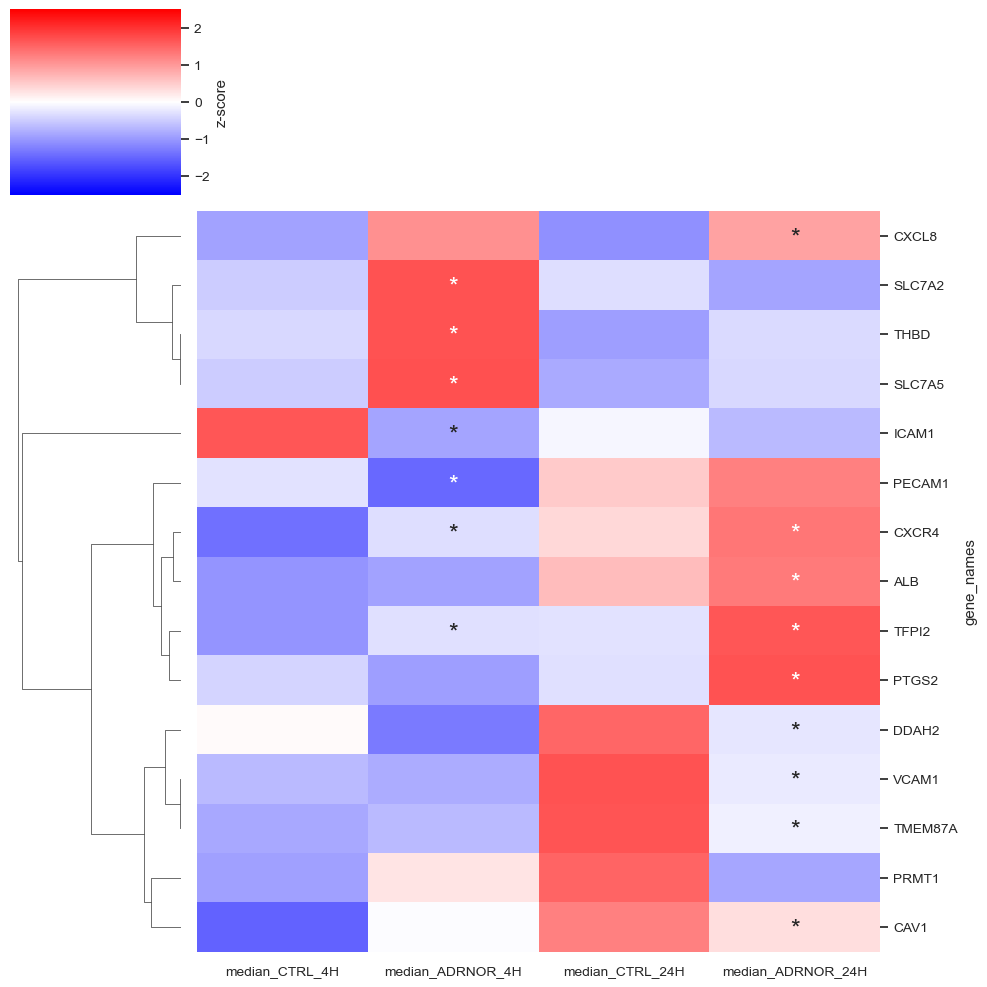

In [23]:
linkage_method = 'average'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)

seaborn.clustermap(zscore_df, 
                   annot=annot, fmt='', annot_kws={'va':'center_baseline', 'size':18},
                   cmap='bwr', 
                   col_cluster=False, 
                   row_cluster=True,
                   vmin=-2.5, vmax=2.5, 
                   method=linkage_method, 
                   metric=distance_metric, 
                   yticklabels=1, 
                   cbar_kws={'label':'z-score'})

matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('friday.svg')